<a href="https://colab.research.google.com/github/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/master/plantomatic_coursework_mediaprocessing_group_i.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**P L A N T O M A T I C** - COURSEWORK

---

*Kian Lütke, Carsten Montag, Johannes Maximilian Stürenburg*

This document outlines the documentation and progress journal of group I of the class _Media-Processing_. This work is divided in several chapters. Each section will be presented with executable code examples which will be - if run in the correct order - in the end illustrate the whole project together. 

It's very important to activate the following colab features<br> Click on the gear-icon in the upper right corner and under miscellaneous/sonstiges tick the two options:
- Corgi mode
- Kitty mode


# 1. Introduction



## 1.1. Motivation

This coursework is part of a multi-project class called _Mediaprocessing_ taught by Prof. Dr. techn. Susanne Boll-Westermann and Dr.-Ing. Larbi Abdenebaoui. During the introduction weeks several Projects were introduced to pick from. As one of the group members does grow herbs at home the obvious choice here is the project _How Is My Plant Doing_. To briefly explain the goal subject: An image of a plant should be analyzed to tell whether the plant needs watering or not.  



## 1.2. Case/Goal

The main goal of the project is to distinguish between two different plants and classify them to get an idea about their current state. 

A case was developed to fund the classwork’s structure upon:


<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/master/figures/1-concept.png?raw=1" height="300px" style="margin: 3em;">

**Fig 1** - Rough Concept

The idea outlines that some sort of robot will take care of a kitchen-garden. The robot should move from plant to plant taking pictures and processing the images. Afterwards the images will be analyzed and classified. The robot decides whether the plant needs to be watered or not. In the letter case a message will be send to the owner’s mobile device to inform about the plants state. The message could contain the image of the plant itself as well. As there is no access to a real robot which actually is able to move. This project will make use of a stationary Raspberry Pi computer with a camera attached to it. The Raspberry Pi will then take a set of pictures every hour and evaluate the plant-state directly.    



## 1.3. Methodology
This work is divided in two main sections: The feature analysis part and the machine learning part. The first part will cover how images were gathered and how these images will be processed in order to prepare them for the machine learning training. In the second part the actual learning of the machine learning algorithms.


# 2. Feature Analysis



## 2.1. Data Gathering

This section describes the process of acquiring images of the plants. The first approach was to use a mirrorless system-camera to take thousands of pictures.

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/dlsm_basilikum.jpg?raw=1" height="300px" style="margin: 3em;">

**Fig 2** - Picture taken with a DSLM Full Frame Camera [Sony a7 – 50mm/f5.6]

As seen in Figure 2 the results are astonishing. The downside comes with the amount of time needed to take all the needed images. Taking approx. 1200 images took around 3 hours. So, the idea came up to take short videos of the plant and extract single frames to process them as images. For example, a short clip of 30 seconds could generate 1800 images if every fame is used.

60 FPS Footage: 30 (seconds) * 60 (fps) = 1800

The drawback here is the blurriness of extracted frames. A solution will be discussed in the next section.

**Choosing the right plants**

At the beginning of the projects two different plants were chosen: Basil and German mint. During this project we decided – because of the difficulties to distinguish between this two plants  - to switch from mint to chives. We decided to create a diary and observe the plants in different states. More on that in the next chapter.




## 2.2. The Plant-Diary

Thie first report consists of two different plants. One chive and one basil. They were captured on video in different time-intervals. The expected outcome should be a good base to start the training of later models.

### Diary One

> Date | State of Chive | Sate of Basil | Video Chive | Video Basil | Notes | Time passed (h) since recovery 
> --- | --- | --- | --- | --- | --- | ---
> 09.12.20 12:30 | New | Needs watering | ------------------------------------------------------ | ------------------------------------------------------ | Last watering | n/a
> 09.12.20 17:00 | No change visible | Fully recovered | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d1/schnittlauch1.gif?raw=1" height="100">  | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d1/basilikum1.gif?raw=1" height="100"> |  | 0
> 10.12.20 12:10 | No change visible | No change visible | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d1/schnittlauch2.gif?raw=1" height="100">  | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d1/basilikum2.gif?raw=1" height="100"> |  | 19
> 10.12.20 19:50 | Visible hanging of the leaves | Pot is very light, will need water soon | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d1/schnittlauch3.gif?raw=1" height="100">  | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d1/basilikum3.gif?raw=1" height="100"> |  | 27
> 11.12.20 11:50 | Even more hanging | Leaves also start hanging; pot is very light; needs water | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d1/schnittlauch4.gif?raw=1" height="100">  | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d1/basilikum4.gif?raw=1" height="100"> |  | 43
> 12.12.20 09:10 | Still green; growing fast | End of experiment; final state is reached | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d1/schnittlauch5.gif?raw=1" height="100">  | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d1/basilikum5.gif?raw=1" height="100"> | Basil gets watered | 64
> 13.12.20 14:30 | Still hanging | Fully recovered again | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d1/schnittlauch6.gif?raw=1" height="100">  | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d1/basilikum6.gif?raw=1" height="100"> | Chive gets watered | 93
> 14.12.20 12:30 | Still the same development | aborted | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d1/schnittlauch7.gif?raw=1" height="100">  | n/a |  | 116
> 16.12.20 08:30 | Still the same development | aborted | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d1/schnittlauch8.gif?raw=1" height="100">  | n/a | Experiment aborted | 159

The table shows different development between the two plants. The chive grew a lot and hat brownish stalks. The basil on the other hand indicated the lack of water with hanging leaves. After reaching the final-hanging state the basil was watered in recovered quickly to its initial state. Contrary the chive did not indicate any lack of water. It just grew and developed more brown stalks. After watering the chive did not respond at all. 

It might be important to say that the chive might have been in a bad, overwatered condition straight out of the supermatket where it wad bought. The soil was quiet wet and mulded already. Also the soil seemed very muddy. 

To conlude, the chive might have shown better results when sowing manually in a better conditionated soil.

### Diary Two

The results in the previous diary led to another experiment with a different plant. Instead of using the chive for the experiment, a parsley was introduced.

> Date | State of Parsley | Sate of Basil | Video Parsley | Video Basil | Notes | Time passed (h) since recovery 
> --- | --- | --- | --- | --- | --- | ---
> | | | ------------------------------------------------------ | ------------------------------------------------------ | | 
> 16.01.20 10:30 | Newly bought plant | Newly bought plant | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d2/petersilie1.gif?raw=1" height="100">  | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d2/basilikum1.gif?raw=1" height="100"> |  | 0
> 17.01.20 10:30 | No change visible | No change visible | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d2/petersilie2.gif?raw=1" height="100">  | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d2/basilikum2.gif?raw=1" height="100"> |  | 24
> 17.01.20 17:30 | Leaves at the bottom start drying | Form a bit changed | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d2/petersilie3.gif?raw=1" height="100">  | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d2/basilikum3.gif?raw=1" height="100"> |  | 31
> 18.01.20 10:30 | Slowly going to hang | Starts leaning sideways | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d2/petersilie4.gif?raw=1" height="100">  | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d2/basilikum4.gif?raw=1" height="100"> |  | 48
> 18.01.20 21:30 | Growed a bit; stalks falling into different directions | Even more dried bottom leaves | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d2/petersilie5.gif?raw=1" height="100">  | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d2/basilikum5.gif?raw=1" height="100"> |  | 59
> 19.01.20 14:30 | Same development | Por very light, needs water very soon | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d2/petersilie6.gif?raw=1" height="100">  | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d2/basilikum6.gif?raw=1" height="100"> |  | 76
> 20.01.20 12:30 | Endstate: Still green no differentiatable signs of dryness | Dry bottom leaves. Hanging just a bit | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d2/petersilie7.gif?raw=1" height="100">  | <img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/gif/d2/basilikum7.gif?raw=1" height="100">  |  | 98

Its very noticable how different the basil is developing this time. Instead if having its leaves hang it starts drying on the bottom where the leaves are small. The parsley on the other hand did just grow and started falling into different directions. After watering it did not show any differences just like the chives.

### Findings
Two plants of the same kinds can indeed develop completely different. This could be due to the fact that the environment is change in example temperature, moisture and so on. Also its not known under which circumstances the plants grew as they were bought from the supermarked. Each plant bought did behave different and showed different signs of dryness.

For the later machine learning model, all basil footage will be combinded into theree different stages. It will be further explained in the corrisponding chapter.


## 2.3. Pre-Processing

To help the later machine learning processes, an image-processing pipeline was introduced. First and foremost the captured video material must be converted to single frames. Whilst having this frames already openend a few operations to improve learning can be made. Also very blurry images should be sorted out.

The following diagramm is illustrating the idea behind the pipe. 

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/figures/ppipe.svg?raw=1" height="380px" style="margin: 3em;">

**Fig 2** - Pre Processing Pipe

The figure will not be explained in detail instead the code will be executable interactively in the following. Please note that the code-snippets must be executed in the order they appear.



In [ ]:
%%bash
# Download the Video from Server

PLANTS=('basilikum' 'petersilie')
STATES=('1' '2')
SERVER_URL='https://video.natgo.dev/'

# Create plants folder
mkdir plants
cd plants

for plant in "${PLANTS[@]}";do
  for state in "${STATES[@]}";do
    wget "$SERVER_URL$plant$state.mp4"
    mkdir $plant$state
  done
done


The snippet above will download the videos taken of the plants in two different states.
 1. Fresh
 2. Dry

Different approaches were tried; like downloading three classes/states of each plants. But the results (which can be found in later chapters) were not that astonishing.  

In [ ]:
# imports
import cv2 as cv2
import numpy as np

# CONSTANTS
BLURRYNESS_THRESHOLD = 50 #@param {type: 'slider', min: 0, max: 150}
HSV_LIGHT_GREEN = (30,100, 80)
HSV_DARK_GREEN = (105,255,255)
PLANT_DIR = 'plants'

# FUNCTIONS #
def variance_of_laplacian(image):
	return cv2.Laplacian(image, cv2.CV_64F).var()
 
def resize_img_to_percent(img, percent):
  scale_percent = percent # percent of original size
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
  # resize image
  resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  return resized

# Maskingfunction
def create_green_mask(img):
    hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_image, HSV_LIGHT_GREEN, HSV_DARK_GREEN)
    return cv2.bitwise_and(img, img, mask=mask)

def process_video(video, plant, state):
  index = 0
  while(video.isOpened()):
    ret, frame = video.read()
    if not ret:
      break
    # Every n Frame for testing
    if plant == 'petersilie':
      every_n_frame = 3
    elif plant == 'basilikum':
      every_n_frame = 5
    if index % every_n_frame == 0:
      # Check for blurrynes
      gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
      focus_measure = variance_of_laplacian(gray)
      if focus_measure > BLURRYNESS_THRESHOLD:
        # resize image
        frame = resize_img_to_percent(frame, 50)
        # mask image
        frame = create_green_mask(frame)
        # canny the image
        frame = cv2.Canny(frame,100,200)
        cv2.imwrite(f'./{PLANT_DIR}/{plant}{state}/{plant}{index}.jpg', frame)
      else:
        print(f'{plant} # {state} Frame #{index}: Too blurry! Focus Measure: {focus_measure}')
    index += 1



This listing is showing the initial definition of functions which will be used to mask, resize or measure the focus of images. The latter one was brought up by a study from S. Pertuz, D. Puig and Miguel Ángel García in 2013 where 36 different approaches of mesuring focus were examined. The decision to use the Laplacian Variance was take because the measurement method performed best over all [1]. 
With this method, it is possible to sort out blurry images, because Videos are not always perfectly focused.

In this projekt two different methods will be tried to optimize the images for the later machine learning.

1. Masking the image
2. Detecting edges on the masked image

It will be investigated if these methods lead to better machine learning results. 

For masking the the image a coversion of the image into the HSV (Hue, Saturation, Value) takes place. The Variables `HSV_LIGHT_GREEN = (30,100, 80)
HSV_DARK_GREEN = (105,255,255)` are defining the range in which the image should be masked. The result looks like the following image [2]:

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/basilikum_masked.jpg?raw=1" width=400>
  
<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/petersilie_masked.jpg?raw=1" width=400>


**Fig 3** - Green-masked images

To further simplyfy the images another layer of simplification is made. Just using the edges found by the canny algorithm which is performing well on the masked images like seen in this picture [3]:

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/basilikum_cannied.jpg?raw=1" width=400>
<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/petersilie_cannied.jpg?raw=1" width=400>

**Fig 4** - Cannied images


The following snippet will load the videos and passes them into the processing function to capture single frames and use the functions to modify the images. Not every frame is going to be used as the footage is shot in 60 frames per second and many frames would be nearly exactly the same.



[1] https://www.semanticscholar.org/paper/Analysis-of-focus-measure-operators-for-Pertuz-Puig/8c675bf5b542b98bf81dcf70bd869ab52ab8aae9?p2df<br>
[2] https://www.pyimagesearch.com/2014/08/04/opencv-python-color-detection/<br>
[3] https://www.sciencedirect.com/science/article/abs/pii/S0031320300000236<br>

In [ ]:
# Iterate over videos and process them
plants = ['basilikum', 'petersilie']
states = [1, 2]

for plant in plants:
  for state in states:
    video = cv2.VideoCapture(f'./{PLANT_DIR}/{plant}{state}.mp4')
    process_video(video, plant, state)


## 2.4. The Robot aka the Raspberry Pi

To mimic a robot a Raspbarry Pi coupled with the pi camera module was used in this project. 

The idea is as mentioned that the raspberry pi captures an image occasionally and predicts its state with the use of the machine learning models which will be obtained later. 

This is the first prototype of the raspberry-robot:

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/pi_initial.jpg?raw=1" width=400>
<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/pi_initial_2.jpg?raw=1" width=400>

**Fig 5** The Raspberry Pi Robot

The first experiments with the pi camera module were made with the Python-library _picamera_. [4]

The following snippet illustrates how pictures are taken and processed right on the Raspberry Pi (this is not executable in this notebook):

```python
#!/usr/bin/python3.7

from picamera import PiCamera
from time import sleep
from fractions import Fraction
import numpy as np
import cv2
import bot_api as bot

# Globals
image_path = '/home/pi/mediaprocessing/images/plant.jpg'
image_masked_path = '/home/pi/mediaprocessing/images/plant_masked.jpg'
image_canny_path = '/home/pi/mediaprocessing/images/plant_cannied.jpg'
LG = 19
DG = 56 
HSV_LIGHT_GREEN = (LG,100, 100) 
HSV_DARK_GREEN = (DG,255,200)

# functions
def resize_img_to_percent(img, percent):
  scale_percent = percent # percent of original size
  width = int(img.shape[1] * scale_percent / 100)
  height = int(img.shape[0] * scale_percent / 100)
  dim = (width, height)
  # resize image
  resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
  return resized

# Maskingfunction
def create_green_mask(img):
    hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    mask = cv2.inRange(hsv_image, HSV_LIGHT_GREEN, HSV_DARK_GREEN)
    return cv2.bitwise_and(img, img, mask=mask)

def capture_image():
    with PiCamera() as camera:
        # camera set-up
        camera.resolution = (1280, 720)
        camera.rotation = 90
        camera.framerate = Fraction(1, 2)
        camera.shutter_speed = 1000000
        camera.exposure_mode = 'off'
        camera.iso = 100
        sleep(5)
        camera.capture(image_path, quality=95)

capture_image()
img = cv2.imread(image_path)
img = resize_img_to_percent(img, 50)
img = create_green_mask(img)
cv2.imwrite(image_masked_path, img)
img = cv2.Canny(img,100,200)
cv2.imwrite(image_canny_path, img)
```
The image-manipulation functoins mainly stayed the same except of different HSV-values. This is necessary because the images taken by the pi camera are a bit off in colors. Also noticable is the fact that the cameras can be fully adjusted in terms of shutter-speed, exposure-time, resulotion or iso.
So it was possible to produce medium quality pictures in difficult light situations (not direct daylight).

The captured image is afterwards resized, masked and cannied. All images are saved locally to compare different machine learning models in later chapters.

Here are example pictures:

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/bad_basilikum.jpg?raw=1" width=300>
<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/bad_petersilie.jpg?raw=1" width=300>
<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/bad_petersilie_masked.jpg?raw=1" width=300>

**Fig 6** - Raspberry Pi example pictures

As seen in the example the quality of the images is really bad, the module might be defective or not cabable of shooting at least sharp images. As a result the masking fails as seen in Figure 6 (Even with adjusted HSV-values).

So after a lot of trail and error with the pi camera module and also a logitech webcam a new approach must be taken into consideration.

The next idea is to use an IP-camera for taking pictures and process the image on the raspberry pi. The solution is an app called _iPCamera - High-End NetworkCa‪m‬_ which works for iPhone and iPad. [5]

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/ipcam_screenshot.png?raw=1" width=500>

**Fig 7** - iPCamera interface in webbrowser

The stream transferred over the network can be used with opencv to capture frames and process them.

The former function `capture_image()` is now being completely being replaced by the following snipped:

```python
[...]

IP_CAM_URL = 'http://192.168.50.194/live'

def capture_image():
  ip_video = cv2.VideoCapture(IP_CAM_URL)
  ret, frame = ip_video.read()
  cv2.imwrite(image_path, frame)
  ip_video.release()

[...]

```

With that method only one frame is captured and the quality of the images is excellent:

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/basilikum_ipcam.jpg?raw=1" width=400>
<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/basilikum_ipcam_masked.jpg?raw=1" width=400>

**Fig 8** - Images taken by the IP-camera

This images are taken by the same camera as the training material so good results are expected.

[4] https://picamera.readthedocs.io/en/release-1.13/index.html<br>
[5] https://apps.apple.com/de/app/ipcamera-high-end-networkcam/id570912928<br>

## 2.5. Telegram Bot


To notify the plant owner this project uses the telegram-bot API. It is easy to use and no phone-verification, business-profile or similar is necessary to implement a bot like it would be needed with Whatsapp. [5][6]

So after the initial bot-creation, which is easily done by messeging [_botfather_](https://core.telegram.org/bots#6-botfather) on telegram, a bot-token is generated. This token can be used to send requests to the telegram API. 

```python
bot_token = 'YOUR-BOT-TOKEN'
url = f'https://api.telegram.org/bot{bot_token}/getUpdates'
response = requests.get(url)
print(response.json())
```

This snippet will be used to get information about a users messeging the bot. Its needed because the API needs a user-id for sending messeges or images. 

Example ouput would look like this:

```json
{
    "ok": true,
    "result": [
        {
            "message": {
                "chat": {
                    "first_name": "Kian",
                    "id": 388305285,
                    "type": "private"
                },
                "date": 1613207709,
                "from": {
                    "first_name": "Kian",
                    "id": 388305285,
                    "is_bot": false,
                    "language_code": "en"
                },
                "message_id": 242,
                "text": "Hey Bot!"
            },
            "update_id": 119759391
        }
    ]
}
```

The obtained user-id can be further used to send updates with plant state information. 

For this coursework its not necessary to implement the full-blown python telegram-api wrapper [7]. As the API is reachable over the HTTP-Protocol a simple module to send images and text would look like this:

```python
import requests

bot_token = 'YOUR-BOT-TOKEN'
chat_id = '388305285' # Kians
url = f'https://api.telegram.org/bot{bot_token}'

def send_text(bot_message):
    response = requests.get(f'{url}/sendMessage?chat_id={chat_id}&parse_mode=Markdown&text={bot_message}')
    return response.json()


def send_image(imageFile):
    response = requests.post(f'{url}/sendPhoto', data={'chat_id': chat_id}, files={'photo': open(imageFile, 'rb')})
    return response.json()

```

This listing can be imported into any other python-script and used to send messeges to the _chat_id_ shown in the definition scope.


[5] https://core.telegram.org/bots<br>
[6] https://www.facebook.com/business/m/whatsapp/business-api<br>
[7] https://github.com/python-telegram-bot/python-telegram-bot<br>

## 2.6 Testing the Setup

Now bringing together all the above steps some testing is neccessary to verify that everything works as intended.

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/ipcam_setup.jpg?raw=1" width=400>

**Fig 9** - IP Camera Setup

For the test the image-capture snippet (in Chapter 2.4) will be execudet with the folling lines appended:

```python
bot.send_text('Here is an image for you:')
bot.send_image(image_path)
bot.send_image(image_masked_path)
bot.send_image(image_canny_path)
```

The surprinsing good ouput by the bot looks like this:

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/kian/images/bot_screenshot.png?raw=1" width=400>

**Fig 10** - Bot sending test images

The established setup looks promising and delivers high-quality images. Also the Bot can send text and images to the owner of the plants. 

In the next part will cover the development of the machine-learning model.

# 3. Machine Learning Theory

Machine Learning according to Zhang (1999) is a model that uses experience to generate an algorithm that performs an automated mapping from inputs to outputs. The type of input can differ, in the case of this project the input is a picture and the output is a classification.
Machine learnings significance can be shown by comparing it to traditional programming. In the example of an e-mail spamfilter, traditional programming would create a blacklist of senders that are statically classified as spam. In machine learning a model would get a set of e-mails that are classified as spam and not spam, the model itself creates a mapping method that determines if new e-mails are spam.
The machine learning method that was created in this project will be referenced as the model, a model is defined by a set of hyperparameters and architectures.

When comparing the Zhangs definition of machine learning, the experience used is a set of pictures combined with the information what the picture contains. The mapping that needs to be done in the future is determining the object in a picture that has not been used for training. The model thus needs to classify an object, this is also known as a classification problem.
The now described method is calles supervised learning, the supervision here is giving the model said experience.
<br />














## 3.1 Approach

The goal of this project is to differentiate between two different plants and then determining the state of the plant, the state in this case is the hydration. 
We use the supervised learning approach for image recognition in this project, we chose this approach because of the relative simplicity and the adecuacy of the implementation. Other methods, like unsupervised learning where clustering techniques would be used, were examined and the final decision was made to use supervised training.

To implement this learning method the model needs a dataset that includes information about the image in question, this information is supplied in the form of labelling.
All programming in this project was done with Python and Keras, which is the de facto standard for machine learning implementation method.

</br >

## 3.1 Labelling


For the prototype of the convolutional neural network model a basic labelling method was developed. The final classes of images that will need to be classified by the neural network are shown below.

**1:** Basil in need of watering

**2:** Basil in good condition

**3:** Parsley in need of watering

**4:** Parsley in good condition
<br />

These pictures were seperated in different paths and labelled automatically using python. These labels are the additions of "Basilikum" and "Parsley" to the pictures file name. Another more sophisticated labelling process was developed which is described in Chapter **X.X**.
<br />

These pictures were labelled according to the object or respectively the class they show, then are used for the training and validation of the neural network. If we again look at Zhangs definition of machine learning, this database is the experience the machine learning model will use to create a function to map the inputs. If the training is successful, the model would then get a picture of a plant it has not seen before, and then determine the state of the object recognized in this picture.
<br />



## 3.2 Learning




### 3.2.1 Loss Functions

A neural network needs a metric to know how precise the predictions are, this metric is a loss or cost function and is used to change the weights and parameters of a neural network.

The binary crossentropy is used in the prototype of the convolutional neural network as the loss function. It is composed of a sigmoid activation and a cross-entropy loss and can only compute a loss with a maximum class number of two, as the name suggests a binary classification. Since the prototype of the model only needs to differentiate between two classes this function was used. It is described by the following formula.

<br />

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/master/figures/binary_crossentropy.png?raw=1" width=400>

**Fig 11** - Crossentropy Lossfunction

Quelle: https://gombru.github.io/2018/05/23/cross_entropy_loss/




This loss function can only be calculated when using supervised learning. The two relevant values in the function is the predicted class value and the actual class value, which correspond to a value of 0 and 1 in case of the binary classes. The reason the labelling of pictures is neccessary is the calculation of the loss function, this way the network can determine the precision of the network by calculation the error of all inputs.
The result of this function is the deciding factor in changing the weights and parameters of the network which is done automatically by the model. 



**Batch Size**

If for example a batch size of ten is chosen for training, the loss function for these ten pictures will be calculated. The adaption of the weights neccessary to minimize the loss function will be calculated based on the loss function and the average adaption of these weights will be applied at the learning rate. This process will run iteratively to minimize the cost function of all input pictures until a satisfying result is met.



**Learning Rate**

The process of changing the weights based on the cost function is called backpropagation which uses gradient descent methods.
The goal of this process is to determine the global minimum of the loss function, this means that the error of all input pictures would be minimal. In the picture below is a two-dimensional costfunction as an example, a cost function in a neural network typically is highly multidimensional and is dictated by the number of adaptable parameters in a neural network and respectively the size of the network. 
The learning rate determines how fast the changes in the parameters will be applied, some methods use a variable learning rate to counteract the below listed problems.

**1:** The learning rate is too big
This will result in the network not being able to find the global minimum because the adaption steps are too big

**2:** The learning rate is too small
This will result in the network not being able to leave a local minimum. 

<img="figures/" width=500> 

**Fig 12** - Hill Climbing Problem

Quelle: https://www.researchgate.net/figure/Example-of-local-and-global-solutions-in-an-optimization-problem_fig3_322270023





## 3.3 Problems

### 3.3.1 Performance 

When first implementing the convolutional neural network, we used the original size of the image which was taken with a high-quality camera which resulted in erros concerning the temporary storage limitations of the hardware. Due to the multidimensional structure of the input data, a doubling in size of the image means an increase of the input data by the factor 4. Thus the training is only possible with a very small batch size and even then takes a considerable amount of time for training, the obvious solution was a reduction in size of the input pictures, which greatly increased the performance. Analogous to the increase of the image size, a decrease of the image size by the factor of 2 means an input size reduction by the factor 4. The question to be answered  is how the final accuracy of the convolutional neural network is if the image size is greatly reduced. We decreased the size of the image so far that the training of the model is performed in an acceptable timeframe.
<br />

### 3.3.2 Hardware

Without using the generator described in Chapter **X.X**, even a small batch size will cause an error in the programming environment because the amount of temporary storage used is greater than the amount available, which already was sixteen gigabytes of RAM. This happens because all input pictures of the batch will be loaded into the ram for training, with a large amount of training data this limitation is reached very quickly.

The training speed could be enhanced by using hardware that is specialized on using tensorflow, respectively newer Nvidia hardware. This problem was solved by using the Google Collab platform which utilizes specialized hardware on a server. 
<br />


### 3.3.3 Generalization

The goal of this convolutional neural network is the the image classification of a plant and its state. A major problem is the needed generalization of the model, which is the ability to transfer aquired knowledge by the training to input data that has not been used for training, this presupposed a very large variety in the learning dataset. Since we used our own plants the variety is comparatively small, this means that the neural network could  memorize the plants that we used for training instead of learning its defining features. In this case the model could only recognize the used plants reliably but not new data for predictions.
<br />

##3.4 Types of Layers in a CNN

A convolutional neural network for image recognition can be composed of multiple types of layers. Typical layers are the Conv2d Layer, the MaxPooling Layer, a Dropout Layer, a Flatten Layer and a Dense Layer, which will shortly described in this chapter.


**Conv2D Layer**

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/master/figures/Conv2D.gif?raw=1" width=500>

**Fig 13** - Conv2D Layer

Quelle: https://towardsdatascience.com/conv2d-to-finally-understand-what-happens-in-the-forward-pass-1bbaafb0b148

The Input of a Conv2D Layer is three-dimensional, this naming scheme can be confusing, but the two-dimensionality of this layer is based on the filters movement. In the example of this picture the filter has the size of three by three and a stride of one. The filter can also be called a kernel, this size defines the convolution size, a size three by three kernel convolutes nine pixels into one. The stride is the size of steps that are done after each convolution, in this animation the stride is one.
The features of nine single pixels would be condensed into a single pixel, this produces an abstraction of a certain part of the image which could be an edge of a number or the edge of a plants part in the case of this project. Since the filter usually has overlapping due to the striding typically being lower than the filters size, the input is not condensed linearly. The output of this layer is an set of pictures which are smaller than the input picture, this is used to get multipe abstracted sets of features of a single input picture. This output is also called a feature map. Generally speaking these subsets can represent features which could indicate the presence or abscence of a certain object. The number of features in these maps typically are lower after each respective layer, the first feature map in the case of number recognition could represent the upper half of an eight which is a circle. Further feature maps usually are subfeatures like parts of the circle mentioned above.


**MaxPooling**

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/master/figures/MaxPooling.gif?raw=1" width=500 >

**Fig 14** - MaxPooling Layer with size 2x2
Quelle: https://developers.google.com/machine-learning/practica/image-classification/convolutional-neural-networks

The MaxPooling Layer depending on the pooling size takes an image array as the input, typically this input comes from the Conv2D layer. With a pooling size of two by two the highes value of these pixels is saved and the rest discarded, this is essentially a simple downscaling of a picture which keeps the essential part of the input information. If a single input consists of three black pixels and one white pixel which represents a border of an object, only this information is saved because it is assumed that lower valued pixels are not essential to the pictures information. This pixel value could also represent a color which may be relevant in the classification. A MaxPooling size of two by two would reduce the input by the factor 4. The goal of this layer is the reduction of the input size with the minimal loss of valuable information, which will increase performance.


**Dropout Layer**

This layers function function is to stop overfitting in the neural network, which would mean the network is not generalizing well and learns the inputs used for training. This is especially prevalent in small datasets.
Parts of the input are then forgotten at a random rate which according to Srivastava et. Al. prevents units from co-adapting too much, which improved performance in multiple supervised learning tasks.

Quelle: https://jmlr.org/papers/v15/srivastava14a.html


**Flattening**

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/master/figures/Flattening.png?raw=1" width=500>

**Fig 15** - Flattening step

Quelle: https://www.superdatascience.com/blogs/convolutional-neural-networks-cnn-step-3-flattening

The Flattening Layer is a preperation for the further input of the fully connected layer, this fully connected layer can be described as a traditional non-convolutional neural network. This input needs to be a single array due to the nature of the used network, the flattening takes all multidimensional feature subsets and produces one  one-dimensional array. This step does not condense information and is solely a data transformation.


**Fully Connected Layer**

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/master/figures/fully_connected.png?raw=1" width=500>

**Fig 16** - Fully Connected Layer 


Quelle: https://towardsdatascience.com/the-most-intuitive-and-easiest-guide-for-convolutional-neural-network-3607be47480


This layer takes the array of values from the flattening step and is composed of multiple layers of classical neurons. The Conv2D, MaxPooling and flattening steps before this layer can be seen as preparations for the majority of calculations the model needs to do in order for a prediction. As described in the learning chapter these weights and biases of the neurons in this layer are adapted to improve the models prediction capabilities.


**Dense Layer**

The Dense Layer is a condensation of a previous layer, because of this reduction of the neuron count this is called the Dense Layer. If the goal of a CNN is the determination if a the object in a picture ist a dog or a cat, the last layer should be composed of two neurons in a dense layer. One of these neurons is symbolically a cat and the other a dog, if the final value of the neuron classifying a cat is 0.84, this would mean that the object in said picture is a dog with 84% certainty. The number of dense neurons in the last layer is typically the number of possible classes that should be predicted by a convolutional neural network.
[QUELLE]

## 3.5 Custom prototype model

For the first approach a custom model was created using a set of Conv2D and MaxPooling layers.
<br />

```python
def get_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(IMG_HEIGHT,IMG_WIDTH,COLOR)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3,3), activation="relu"))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128, (3,3), activation="relu"))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128, (3,3), activation="relu"))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.2))
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dense(NUMBER_OF_CLASSES, activation="softmax"))
    model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4), metrics=["acc"])
    return model
```


The models layers and hyperparameters were added in this function and the ReLU activation function was used. This function does not change positive values and negative values are mapped to zero, as seen in the figure below.


<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/master/figures/relu.png?raw=1" width=300>

**Fig 17** - ReLU Activationfunction

Quelle: https://medium.com/@kanchansarkar/relu-not-a-differentiable-function-why-used-in-gradient-based-optimization-7fef3a4cecec

**Visualization of Layer Outputs**


The following figure is the input of the CNN with the shape of 960x540x3. 960 being the width, 540 the height and 3 the color channels. The brightness of the pictures features indicates the activation function of each pixel, the scale of this activation value is represented in the bar on the right of the figure.
<br />


<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/master/figures/1.png?raw=1" width=700>

**Fig 18** - Input Shape

The following picture is the result of multiple MaxPooling and Conv2D layers. These pictures are feature subsets, visually the most prominent features are the edges of the plants leaves.

<br />

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/master/figures/4.png?raw=1" width=1700>

**Fig 19** - Shape after multiple convolution and pooling steps

These subsets are then flattened into a single array which is then used in the fully connected layer. The following picture is the single array with the corresponding pixels which function as the input for the fully connected layer. This array is scaled and composed of numbers between zero and one which enable a neural network to process them.

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/master/figures/7.png?raw=1" width=1700>

**Fig 20** - Output of the flattening process (Exerpt)

The last layer of the convolutional neural network represents the number of classes which are predicted by the network, in this case the last layer consists of two dense neurons representing two plants. The right neuron contains the value zero, and the left neuron which is white the value one, which means that the network classifies the input picture to the left neuron with a certainty of 100% or 1.0.

**Fig 21** - 

Below is the summary of the custom model, the layers and parameters of each layers are listed here. A total of 118,076,098 parameters can be trained to minimize the cost function. This translates to a global cost function with more than a hundred million dimensions, this resulted in  high time and hardware demands for training and paired with non-optimal results led to the rejection of the custom model in favor of the EfficientNet architecture.



```Python
Layer (type)                 Output Shape              Param #
=================================================================
conv2d (Conv2D)              (None, 538, 958, 32)      896
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 269, 479, 32)      0
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 267, 477, 64)      18496
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 133, 238, 64)      0
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 131, 236, 128)     73856
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 65, 118, 128)      0
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 63, 116, 128)      147584
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 58, 128)       0
_________________________________________________________________
flatten (Flatten)            (None, 230144)            0
_________________________________________________________________
dropout (Dropout)            (None, 230144)            0
_________________________________________________________________
dense (Dense)                (None, 512)               117834240
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 1026
=================================================================
Total params: 118,076,098
Trainable params: 118,076,098
Non-trainable params: 0

```

## 3.6 EfficientNet

The EfficientNet was presented in 2019 by Tan Mingxingand and V. Quoc in the Paper *EfficientNet: Rethinking Model Scaling for Convolutional Neural Networks*
Through repeated scaling this net has state-of-the-art performance and precision in image recognition.

There are multiple ways of scaling a convolutional neural network to improve its performance visualized in the figure below. 

**a:** increasing neural network input resolution

**b:** increasing neural network width

**c:** increasing neural network depth

The scaling of these parameters used to be done arbitrarily, the solution of the EfficientNet is to provide a ratio in what steps these scaling methods are performed in the form of compound scaling, respectively the scaling of all three methods shown.

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/master/figures/effinet_architecture.png?raw=1" width=700>

**Fig 20** - EfficientNet Architecture

Quelle: https://ai.googleblog.com/2019/05/efficientnet-improving-accuracy-and.html

The Baseline of a model can be seen in part a of the upper figure, this is the model that needs to be changed in order to improve either performance, precision or both. In the figure below the Accuracy relative to the FLOPS is shown, FLOPS are floating point operations per second, this is a metric for the computational performance. The EfficientNet Architecture can be scaled into categories B1-6, each category having a higher compound scaling, thus more accuracy and more FLOPS needed. The EfficientNet has better accuracy in the ImageNet database than every other convolutional neural network architecture it was compared to. When this paper was reviewed, the decision was made to use the EfficientNet architecture for further implementation of the project after the custom model was discarded.

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/master/figures/effinet_efficiency.png?raw=1" width=700>

**Fig 20** - EfficientNet Efficiency



QUELLE: https://arxiv.org/pdf/1905.11946.pdf



# 4. Machine Learning in Practice

## 4.1. Preparations for model training 


### 4.1.1 Labeling the data

Because for the machine learning model a supervised learning approach was chosen, the pictures generated and cut from the plant-diary videos by the preprocessing pipeline had to be labeled in order to feed them to the model.

The neural net after training shall be able to differenciate and classify dependant on model performance between two to three states for each plant recorded in our diary. For that the produced videos were fit into three categories to later attach the corresponding label to the filename. These labels are "healthy", "in need of water" and "dried up" for each plant. Because over the duration of the project the plants to classify were changed a few times, so the labeling process had to be designed accordingly variable.
In order to do that, the recorded videos were named matching the given plants species and with a rising number matching the state of the plant. So a video named "basil1" would be a video of a fresh from-store basil plant. The worse the state of the plant the higher the number following the plant name.
With all of that in mind the machine learning programming process began with conceiving a class based label generator for the pipeline which later was refactored to produce the K Folds.
The following code snippet shows the constructor of the class which will be explained in the textblock after.

```python
#initializing the directorys and label dictionaries 
class KFoldGenerator():
  def __init__(self,data_dir,plants):
      self.RS = 69
      random.seed = self.RS
      self.plants = plants
      self.data_dir = data_dir
      self.nr_classes = len(plants)*3 
      self.dir_list = [dir for dir in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir,dir))]
      if '.ipynb_checkpoints' in self.dir_list : 
        self.dir_list.remove('.ipynb_checkpoints')
      self.plant_nrs = []
      for plant in plants:
          nrs = sorted([int(dir.replace(plant,'')) for dir in self.dir_list if plant in dir])
          self.plant_nrs.append(nrs)
      self.class_dict = {}
      for i,plant in enumerate(self.plants):
          nrs = self.plant_nrs[i]
          self.class_dict.update({
            f'{plant}{nrs[0]}' : f'_class_{plant}_frisch',
            f'{plant}{nrs[1]}' : f'_class_{plant}_giessen',
            f'{plant}{nrs[2]}' : f'_class_{plant}_vertrocknet',
          })
      
      filepaths = self.__load_paths__()
      self.filepaths = self.__set_class__(filepaths)
```

The constructor takes an array of plant names to classify into its two to three states as strings together with the parent folder path in which the subfolders for the different classes are located. 

These sub-folders already contain the cropped images generated from the videos. 
Based on the number of plants given in the "plants" array, the number of classes for the neural network for classifying is set by multiplying the length of the array by three.

Following that a list comprehension determines the sub folder paths contained in the parent directory. The subdirectory names which are the base for each class are now stored in the class variable "dir_list".

Based on that the numbers following the plant name in the directory name had to be ordered to allow for a dictionary to be created which is intended to be used to match a label to each given picture in those subdirectorys. This is done in the for-loop beginning in line 12.

The loop iterates over the in the constructor passed string array to determine the corresponding directory numbers emerging from its video name for each label and plant ordered by plant state. The determined numbers for each plant are now used to create a dictionary with the plant name and directory number as key and the class as value to be used in the actual labelling process. This allows us to pick later diary entrys with higher video numbers for our neural net because with this approach the pipeline is able to treat ["basil1.mp4", "basil2.mp4", "basil3.mp4"] the same way it treats ["basil2.mp4", "basil5.mp4", "basil8.mp4"] without us being forced to manually change anything in the pipeline except the videos to generate cropped pictures from in the short bash script at the beginning of the pipeline used for file downloading. 


Also the number of states to classify between is easy to change by just configuring the classes dictionary and number of videos served to the pipeline.
With all required preparations taken care of the actual labeling process is called in the last two lines of the __ init __() function.
The function __ load_paths __() takes care of collecting the complete filepaths for each picture in the targeted subdirectorys into a single list and return it.

```python
#load all filepaths
def __load_paths__(self):
      all_paths = []
      for dir in self.dir_list:
         dir_path = os.path.join(self.data_dir,dir) 
         paths = [os.path.join(dir_path,file) for file in os.listdir(dir_path)]
         all_paths.extend(paths)
      return all_paths 
      
``` 

Now the labels can be set which is done in the __ set_class __() function by applying the previously generated dictionary to each filepath in the "filepaths" list.

```python
#define the class based on the src dir
def __set_class__(self,files):
    classes = []
    for file in files:
      dir = os.path.dirname(file)
      self.class_dict.get(os.path.basename(os.path.normpath(dir)))
      tup = (file,self.class_dict.get(os.path.basename(os.path.normpath(dir))))
      classes.append(tup) 
    random.shuffle(classes)
    return classes
```

To do that the function iterates over each image path, isolates the subdirectory path the image is stored in as a single string without special characters to match the dictionary keys. The resulting classes returned by the get() function of the dictionary str stored together with the complete filepath as a tuple which leaves us with a list of labels and imagepaths to be used for a single model training aswell as for the KFold generation. 

### 4.1.2 A KFold cross validation for performance measuring
To determine the performance of a given model it has to be validated what means testing it on different test data sets. In Image Recognition in contrast to for example Time Series Analysis a simple so called kfold cross validation is the standard to validate the performance of a machine learning model.

Performing a kfold cross validation means splitting the given dataset into k   splits with train and test data while each split contains 1/k of the original dataset as test set for validation. The remaining data is used for training. By that each picture of the complete data set is exactly once used for validation and with calculating the mean performance by multiplying each result with 1/k and adding them up afterwards a well validated perfomance measure in form of the validation accuracy is the result[1]. 

The following picture illustrates the concept very good. 

<img src="https://miro.medium.com/max/4984/1*kheTr2G_BIB6S4UnUhFp8g.png" width=800>[2]

To implement this the label generator class had to be extended with functions serving the purpose of generating the folds and copying the cropped pictures
to newly created folders for each validation step.

[1] Aurélien Géron, "Hands-on machine learning with Scikit-Learn, Keras, and TensorFlow: Concepts, tools, and techniques to build intelligent systems",O´Reilly Media,2019

[2] https://miro.medium.com/max/4984/1*kheTr2G_BIB6S4UnUhFp8g.png


```python
#generate all folds
def generate_k_folds(self,k):
    copy_list = self.filepaths[:]
    test_size = floor(len(self.filepaths)/k)
    rest = len(self.filepaths)%k
    folds = []
    for i in range(0,k):
      if i == k-1:
        test_size = test_size + rest
      folds.append(self.__generate_fold__(copy_list,test_size))
    dir_kfolds = 'K_FOLDS'  
    os.mkdir('K_FOLDS')
    for i,fold in enumerate(folds):
      current_fold = f'{dir_kfolds}/Fold{i+1}'
      train = fold[0]
      test = fold[1]
      print(test)  
      os.mkdir(current_fold)
      test_dir = f'{current_fold}/test'
      train_dir = f'{current_fold}/train'
      os.mkdir(test_dir)
      os.mkdir(train_dir)  
      self.__copy_list_to_dir__(test,test_dir)
      self.__copy_list_to_dir__(train,train_dir)
#generate a single fold
  def __generate_fold__(self,liste,size):
    test = []
    while len(test)<size:
      test_item = random.choice(liste)
      test.append(test_item)
      liste.remove(test_item)
    train = [file for file in self.filepaths if file not in test ]
    return (train, test)
```


The public method generate_k_folds() of the generator has to be called in order to generate the splits and copy them directly into the working directory. 

This is done by generating a copy of the in the constructor already labeled pictures, calculating the size for each split also taking the slightly bigger last split into consideration by calculating its overhead. 

In the for loop the function __ generate_fold __() is called k times each time taking 1/k*dataset_size random pictures from the list adding them to a new list. The original list entrys are removed from the copied list to make sure they are not taken into account in the next iteration. 

After generating the test set in the function the matching train set is generated by using the concept of list comprehension copying each filepath with its label not present in the test set.

The function returns a tuple containg the train set on the first index and the test set on the second index. These tuples are added to the list folds which is iterated over again beginning in line 11 to copy the files according to the generated folds.

For that purpose for each fold generated a folder is created with the name Fold_i containg two subfolders train and test. 
At the end of the public function the generated train and test lists are seperately handed to the __ copy_list_to_dir __() function together with the previously in the for loop created directory paths.

```python
def __copy_list_to_dir__(self,list,dir):  
    for item in list:
      #read src path and label for each image 
      src = item[0]
      label = item[1]
      #gather file infos
      file_info = os.path.splitext(os.path.basename(src))
      #generate and copy to new filepath based of the given dir
      dst = f'{dir}/{file_info[0]}{label}{file_info[1]}'
      copy2(src = src,dst = dst)

``` 


This function uses the copy2 function of the previously imported shutil package to copy a single file from a given source location handed over in the list of tuples to a destination location. 

This is generated for each picture in the list in line five by putting together the handed over arguments in the list of tuples. The new filepath is created by concatenating the original raw filename with the new folderpath and the generated label in a formatted string. This label can later be interpreted by the training algorithm.

The result of executing the function is a directory containing all generated folds called "K_FOLDS" containing a train and a test folder for each training process.

In [ ]:
K_FOLDS = 10
PLANTS = ['basilikum', 'petersilie']
DIR ='plants'
gen = KFoldGenerator(DIR,PLANTS)
gen.generate_k_folds(K_FOLDS)

So with the number of folds set to 10 the resulting folder produced by calling the function in line five of the above codeblock would look as follows : 

<img src="https://github.com/uol-mediaprocessing-202021/medienverarbeitung-i-how-is-my-plant-doing/blob/carsten/folds.jpg?raw=1" width=400>

The following executable codeblock containsconstructor call together with the generate_k_folds() call below. This performs the complete fold generation process.

In [ ]:
import json
import os
import random
from math import floor  
from shutil import copy2 

class KFoldGenerator():
  def __init__(self,data_dir,plants):
      self.RS = 96
      random.seed = self.RS
      self.plants = plants
      self.data_dir = data_dir
      self.nr_classes = len(plants)*3 
      self.dir_list = [dir for dir in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir,dir))]
      if '.ipynb_checkpoints' in self.dir_list : 
        self.dir_list.remove('.ipynb_checkpoints')
      self.plant_nrs = []
      for plant in plants:
          nrs = sorted([int(dir.replace(plant,'')) for dir in self.dir_list if plant in dir])
          self.plant_nrs.append(nrs)
      self.class_dict = {}
      for i,plant in enumerate(self.plants):
          nrs = self.plant_nrs[i]
          self.class_dict.update({
            f'{plant}{nrs[0]}' : f'_class_{plant}_frisch',
            f'{plant}{nrs[1]}' : f'_class_{plant}_trocken',
          })
      
      filepaths = self.__load_paths__()
      self.filepaths = self.__set_class__(filepaths)
      
  def __load_paths__(self):
      all_paths = []
      for dir in self.dir_list:
         dir_path = os.path.join(self.data_dir,dir) 
         paths = [os.path.join(dir_path,file) for file in os.listdir(dir_path)]
         all_paths.extend(paths)
      return all_paths 
  
  def __set_class__(self,files):
    classes = []
    for file in files:
      dir = os.path.dirname(file)
      self.class_dict.get(os.path.basename(os.path.normpath(dir)))
      tup = (file,self.class_dict.get(os.path.basename(os.path.normpath(dir))))
      classes.append(tup) 
    random.shuffle(classes)
    return classes
      
  def generate_k_folds(self,k):
    copy_list = self.filepaths[:]
    test_size = floor(len(self.filepaths)/k)
    rest = len(self.filepaths)%k
    folds = []
    for i in range(0,k):
      if i == k-1:
        test_size = test_size + rest
      folds.append(self.__generate_fold__(copy_list,test_size))
    dir_kfolds = 'K_FOLDS'  
    os.mkdir('K_FOLDS')
    for i,fold in enumerate(folds):
      current_fold = f'{dir_kfolds}/Fold{i+1}'
      train = fold[0]
      test = fold[1]
      print(test)  
      os.mkdir(current_fold)
      test_dir = f'{current_fold}/test'
      train_dir = f'{current_fold}/train'
      os.mkdir(test_dir)
      os.mkdir(train_dir)  
      self.__copy_list_to_dir__(test,test_dir)
      self.__copy_list_to_dir__(train,train_dir)

  def __generate_fold__(self,liste,size):
    test = []
    while len(test)<size:
      test_item = random.choice(liste)
      test.append(test_item)
      liste.remove(test_item)
    train = [file for file in self.filepaths if file not in test ]
    return (train, test)

  def __copy_list_to_dir__(self,list,dir):  
    print(dir)
    for item in list:
      src = item[0]
      label = item[1]
      file_info = os.path.splitext(os.path.basename(src))
      dst = f'{dir}/{file_info[0]}{label}{file_info[1]}'
      copy2(src = src,dst = dst)


K_FOLDS = 10
PLANTS = ['basilikum', 'petersilie']
DIR ='plants'
gen = KFoldGenerator(DIR,PLANTS)
gen.generate_k_folds(K_FOLDS)

## 4.2. Training the models 
In order to train the models with the generated datasets the folders containing the images have to be placed in memory. 
This is done by calling the function listdir in the native python package "os".
The function returns all folders and files for a given directory path as strings in a non ordered fashion. 
```python
K_DIR = 'K_FOLDS'
RES_DIR = 'results'
NUM_LABELS = len(gen.class_dict)
dict_values = list(gen.class_dict.values())
folds  = os.listdir(K_DIR) 
```


So the list returned in line five with the previously generated folds shown in the picture in chapter 3.2.2 would contain the strings ['Fold1','Fold10','Fold2','Fold3','Fold4','Fold5','Fold6','Fold7','Fold8','Fold9']. This list has to be ordered by the number of the fold to train the models in the correct order. This is realized by ordering the list with the utility function natural_keys() using regular expressions shown below. 
```python
def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]
sorted = folds.sort(key = natural_keys) 
```

With the ordered subdirectories representing each fold representing the data in memory as a next step the Image Recognition models had to be defined.

The executable codeblock below performs later needed import statements aswell as the described fold sorting process.





In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input
from tensorflow.keras.preprocessing.image import (array_to_img, img_to_array,
                                                  load_img)
from tensorflow.keras.applications import EfficientNetB1
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers.experimental import preprocessing
import numpy as np
import re
import matplotlib.pyplot as plt
# defining the image shapes
IMG_H = 240
IMG_W = 240
IMG_C = 3

K_DIR = 'K_FOLDS'
RES_DIR = 'results'
NUM_LABELS = len(gen.class_dict)
dict_values = list(gen.class_dict.values())
print(NUM_LABELS,dict_values)
folds  = os.listdir(K_DIR) 

def atoi(text):
    return int(text) if text.isdigit() else text
def natural_keys(text):
    return [ atoi(c) for c in re.split(r'(\d+)', text) ]

sorted = folds.sort(key = natural_keys) 


### 4.2.1 Defining the model
For the neural network a self configured model consisting of some Conv2D layers always followed by a MaxPooling2D layer was tested first. 

The Output for each tested model is generated using a Dense layer as output containing an output node for each assigned label. In this case a Flatten layer is included between the basic structure and the Output nodes. 

If an image is shown to the network, while or after training, the model outputs a percentage value for each class. The node with the highest value represents the class the neural network predicted for this picture.


The network is trained by serving it the pixels as a numpy array together with the desired label also as a numpy array as input. The network trains by adjusting its weights each time a batch of pictures is served. This is done according to the assigned loss function which in this case is the categorical crossentropy. It measures the error between the nets predictions and the actual label for each batch of images shown. 
This value together with the loss function at the end of each epoch of the training process defines the amount each weight in the neural network has to be changed. By that a high loss value results in a greater change of weights than a low loss value does.
To make sure the neural network doesnt just learn the images by heart the network is shown the test dataset which it hasnt been trained on each epoch. By calculating the accuracy for the test dataset the model performance is measured.

For each of the different models tested a seperate function returning the compiled model was created. 

The defintion for the originally used basic model is shown in the codeblock below. The seperate layers are imported from the keras.tensorflow.layers library.
```python
def get_model_custom():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(IMG_H,IMG_W,IMG_C)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3,3), activation="relu"))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128, (3,3), activation="relu"))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128, (3,3), activation="relu"))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dense(NUM_LABELS, activation="sigmoid"))
    model.compile(loss="categorical_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4), metrics=["acc"])
    return model
```

The input shape and therefore the required shape of the images for the network is defined in the layer defintion of the networks first layer. 
The last layer takes the number of labels as input to define how many dense nodes have to be added the last dense layer.
The returned model is ready for training.

Later because the model didnt perform well a well established pre trained EfficientNet was used for further training.

Because the model is pretrained the model definition is a bit more complicated but effectively has the same components as the self made model. Also the output is the compiled model which is ready to train. This is useful because it takes only one line of code to change the desired model.

```python
  def get_model_Effi():

  # Adam 
  adam = tf.keras.optimizers.Adam(
    learning_rate=0.0005,
    name='Adam')
  img_augmentation = Sequential(
    [
        preprocessing.RandomRotation(factor=0.15),
        preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
        preprocessing.RandomFlip(),
        preprocessing.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
  )
  NUM_CLASSES = 4
  inputs = layers.Input(shape=(IMG_H, IMG_W, 3))
  x = img_augmentation(inputs)
  outputs = EfficientNetB1(include_top=True, weights=None, classes=NUM_CLASSES(x)
  model = tf.keras.Model(inputs, outputs)
  model.compile(
      optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"]
  )
  model.summary()
  return model

  ```

The main part of the model is imported as an already on the imagenet dataset pretrained model.

The main part of the model is concatenated with an input layer to define the shape the images are loaded in and processed to the model.  

In order to now realize the kfold validation the previously generated list of kfolds has to be iterated over. 

The executable code below defines both the models as described.


In [ ]:
def get_model_custom():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(IMG_H,IMG_W,IMG_C)))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (3,3), activation="relu"))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128, (3,3), activation="relu"))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(128, (3,3), activation="relu"))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation="relu"))
    model.add(layers.Dense(NUM_LABELS, activation="sigmoid"))
    model.compile(loss="categorical_crossentropy", optimizer=optimizers.RMSprop(lr=1e-4), metrics=["acc"])
    return model

def get_model_Effi():

  # Adam 
  adam = tf.keras.optimizers.Adam(
    learning_rate=0.0005,
    name='Adam')
  img_augmentation = Sequential(
    [
        preprocessing.RandomRotation(factor=0.15),
        preprocessing.RandomTranslation(height_factor=0.1, width_factor=0.1),
        preprocessing.RandomFlip(),
        preprocessing.RandomContrast(factor=0.1),
    ],
    name="img_augmentation",
  )
  NUM_CLASSES = 4
  inputs = layers.Input(shape=(IMG_H, IMG_W, 3))
  x = img_augmentation(inputs)
  outputs = EfficientNetB1(include_top=True, weights=None, classes=NUM_CLASSES)(x)
  model = tf.keras.Model(inputs, outputs)
  model.compile(
      optimizer=adam, loss="categorical_crossentropy", metrics=["accuracy"]
  )

  model.summary()
  return model

```python
for i,fold in enumerate(folds):
```
In this loop over each fold the train and test data set aswell as the model are loaded for each iteration.
### 4.2.2 Loading the labels and images 
For the loading process based on the list of folds a process loading the labels and images from a list of filepaths had to be implemented.
For this the following helper functions are used.

In [ ]:
def get_file_list(dir):
    #Liste mit kompletten Pfaden der Bilder
    return [os.path.join(dir,bild) for bild in os.listdir(dir)]
def get_labels(bilder):
    matching_dict = ['_'+ os.path.basename(bild).split('_',1)[1].replace('.jpg','') for bild in bilder]
    labels = np.array([dict_values.index(matching_str) for matching_str in matching_dict])
    return to_categorical(labels,NUM_LABELS)
def get_images(bilder):
    num_images = len(bilder)
    images = np.empty((num_images,IMG_H,IMG_W,IMG_C),dtype = np.float32)
    for i,bild in enumerate(bilder):
      image = load_img(bild, target_size = (IMG_H,IMG_W))
      image = img_to_array(image)
      image/=255
      images[i,:,:,:] = image
    return images

The function get_file_list() returns all filenames for a given directory.

So by handing the function the test and train directory in each fold iteration a list of filepaths for the train and test set is generated. On that base the labels and images for each filepath can be loadad

This is done in the follwing functions get_labels() and get_images(). Handed a list of filepaths to jpg files the functions return a numpy array with either the pixels of the different images or the one hot encoded labels with a 1 standing for the correct label. The other positions are set to 0.
The label is determined by extracting the values of the dictionary used in the labeling process isolating the label saved in the path string and assigning the index of the corresponding entry of the dictionary as label.
The resulting numpy array after the one hot encoding process with four labels to classify between could look like this : [0, 0, 1, 0].

If a list of four paths is given the resulting numpy arrays also contains data for four files either one hot encoded labels or the pixel data of the jpg file.


### 4.2.3 The Training Loop
```python
get_model = get_model_Eff
BATCH_SIZE = 8
EPOCHS = 35
RES_DIR = 'results'
if not os.path.exists(RES_DIR):
    os.mkdir(RES_DIR)

histories = []
len_evals = []

for i,fold in enumerate(folds):
    tf.keras.backend.clear_session()  
    test =  get_file_list(os.path.join(K_DIR,fold,'test'))
    train = get_file_list(os.path.join(K_DIR,fold,'train'))
    y_test = get_labels(test)
    x_test = get_images(test)
    model = get_model()
    sequence = Generator(train, BATCH_SIZE) 
    history = model.fit(sequence, epochs = EPOCHS, validation_data = (x_test,y_test))
    model.save(f'{RES_DIR}/k{i+1}.h5')
    len_evals.append(len(test))
    histories.append(history.history)
```
The codeblock shown above is responsible for the training itself and by starting it the training process for all generated folds is set into motion. Before the actual iteration over the folds and therefore the seperate training cycles the network structure and some hyperparameters are defined.
The get_model variable stores the model generation method and by that the model that shall be used for the training cycle. 
The batch_size defines how many pictures the network processes simultaneously for weight adjustments. The hyperparameter epochs defines how often the training set shall be iterated through.

The code below shows the first configuration of the training loop in which the training set aswell as the test set are directly loaded into RAM. 

```python

for i,fold in enumerate(folds):
    tf.keras.backend.clear_session()  
    test =  get_file_list(os.path.join(K_DIR,fold,'test'))
    train = get_file_list(os.path.join(K_DIR,fold,'train'))
    y_train = get_labels(test)
    x_train = get_images(train)
    y_test = get_labels(test)
    x_test = get_images(test)
    model = get_model()
    history = model.fit(X = x_train,y = y_train , epochs = EPOCHS, validation_data = (x_test,y_test))
    model.save(f'{RES_DIR}/k{i+1}.h5')
    len_evals.append(len(test))
    histories.append(history.history)
```
Because on all systems the code ran on a RAM exceeded error was thrown thrown a RAM friendly solution had to be found.

### 3.3.4 Resolving RAM issues with the Sequence interface
The idea was to not load the complete training set into memory directly. Instead the Sequence interface imported from the tf.keras.utils package  is used. 
The class feeds data to the model during the training process in a self designed way.
The function __ len __ () defines the number of batches avaible with the given batch size and the length of the training data for each epoch and is mandatory for a functioning Sequence class.
The __ get_item __() function shown below is called each time a new batch shall be loaded. It automatically is handed the current batch index. The matching images are determined by calculating the first and last image of the batch in the given list of filepaths based on the current batch index. 
The loading process behind this is already explained in chapter 3.3.2.
As seen below for each batch the described methods for obtaining the training images and labels are called by handing them the prevoiusly determined batch matching filepaths as a list. This way the batches are loaded step by step from the hard drive which resolves the previously encountered RAM issue.


In [ ]:
class Generator(tf.keras.utils.Sequence):
    def __init__(self,img_files,batch_size):
        self.batch_size = batch_size
        self.batches = int(len(img_files)/batch_size)
        self.img_files = img_files
        self.imgs = len(img_files)
        self.rest = self.imgs-self.batches * self.batch_size
    def __len__(self):
        if len(self.img_files)%self.batch_size == 0 : return self.batches
        elif len(self.img_files)%self.batch_size>0 :return self.batches+1 
        
                   
    def __getitem__(self,idx):
        
        start_index = idx * self.batch_size
        if idx < self.batches:
            last_index = (idx+1) *self.batch_size   
        else :
            if self.rest >0 : last_index = self.imgs
            else: last_index = (idx+1)*self.batch_size
        if start_index == last_index : last_index = start_index +1 
        current = self.img_files[start_index: last_index]
        
        X = get_images(current)
        y = get_labels(current)
        print(' ',self.imgs,'start',start_index,'end',last_index)
        return X,y 
    
    def on_epoch_end(self):
        random.shuffle(self.img_files)

The sequence class is handed instead of the arguments X and y to the fit call of the defined model. A functioning and executable training loop with the implemented data generator for the model looks as follows.

In [ ]:
get_model = get_model_Effi#get_model_custom
BATCH_SIZE = 8
EPOCHS = 40
RES_DIR = 'results'
if not os.path.exists(RES_DIR):
    os.mkdir(RES_DIR)

histories = []
len_evals = []

for i,fold in enumerate(folds):
    tf.keras.backend.clear_session()  
    test =  get_file_list(os.path.join(K_DIR,fold,'test'))
    train = get_file_list(os.path.join(K_DIR,fold,'train'))
    y_test = get_labels(test)
    x_test = get_images(test)
    model = get_model()
    sequence = Generator(train, BATCH_SIZE) 
    history = model.fit(sequence, epochs = EPOCHS, validation_data = (x_test,y_test))
    model.save(f'{RES_DIR}/k{i+1}.h5')
    len_evals.append(len(test))
    histories.append(history.history)

This starts the training process.
In this loop the results of the training process are saved as a so called history object containing all metrics on the test and train after each epoch  aswell as the length of the observed test set for later evaluations. Also the trained model is saved to the previously created 'results' folder for the later export to the Raspberry Pi.


### 4.2.4 Model evaluation

For evaluation the graphics library matplotlib and the table processing library pandas are used.

The during the training process stored metrics in the history object are used together with the test set lengths to determine the model performance.

As a first step history objects are transformed to pandas dataframes for easier data handling.



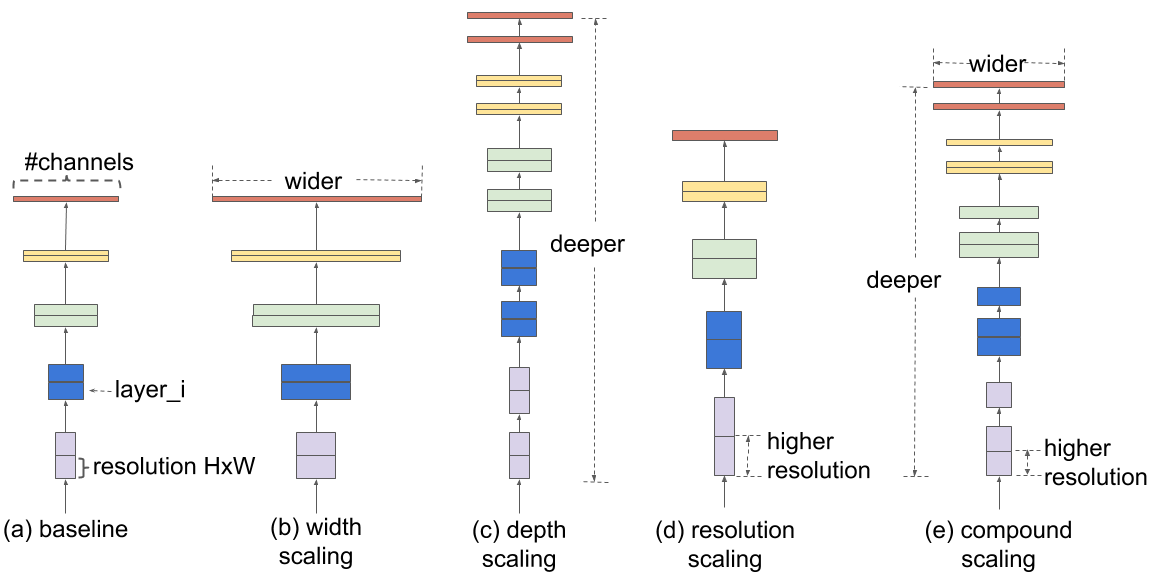
Quelle: https://ai.googleblog.com/2019/05/efficientnet-improving-accuracy-and.html

<br />

The Baseline of a model can be seen in part a of the upper figure, this is the model that needs to be changed in order to improve either performance, precision or both. In the figure below the Accuracy relative to the FLOPS is shown, FLOPS are floating point operations per second, this is a metric for the computational performance. The EfficientNet Architecture can be scaled into categories B1-6, each category having a higher compound scaling, thus more accuracy and more FLOPS needed. The EfficientNet has better accuracy in the ImageNet database than every other convolutional neural network architecture it was compared to. When this paper was reviewed, the decision was made to use the EfficientNet architecture for further implementation of the project after the custom model was discarded.

<br />

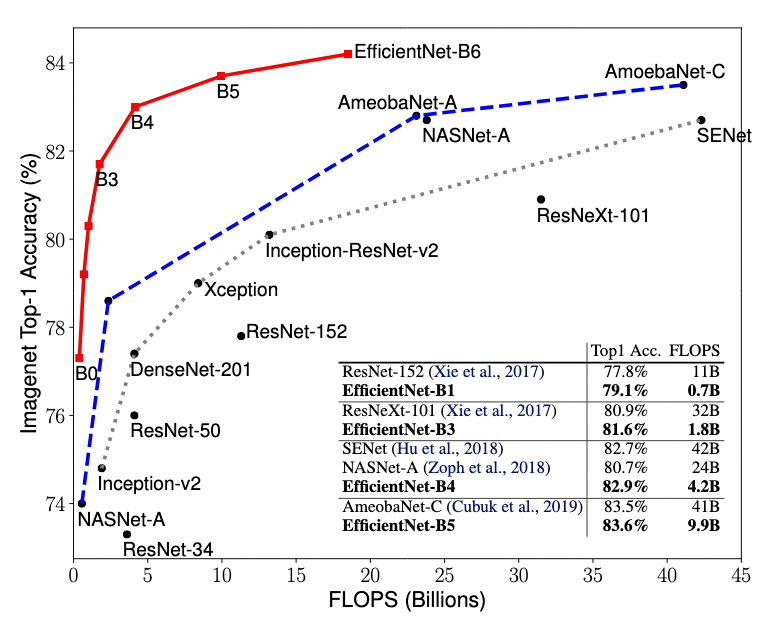

QUELLE: https://arxiv.org/pdf/1905.11946.pdf